In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import json
from networkx.readwrite import json_graph
import pandas as pd

airports = pd.read_csv('airports.csv')
routes = pd.read_csv('routes.csv')

flights  = routes[(routes.dest_airport.isin(airports.iata) & (routes.airport.isin(airports.iata)))]


In [2]:
def mount_graph(flights, airports, label_size_limit=20):
    graph = nx.from_pandas_edgelist(flights, source = 'airport', target = 'dest_airport', create_using = nx.DiGraph())

    deg = nx.degree(graph)
    sizes = [5 * deg[iata] for iata in graph.nodes]

# altitude = airports[['altitude','iata']]
# print(altitude)
# altitude = [altitude[iata] for iata in graph.nodes]

    pos = {v['iata']: (v['long'], v['lat'])
           for airport, v in
           airports.to_dict('index').items()}


    labels = {iata: iata if deg[iata] >= label_size_limit else ''
                      for iata in graph.nodes}
    
    return graph, pos, labels, sizes

In [3]:
graph, pos, labels, sizes = mount_graph(flights, airports)

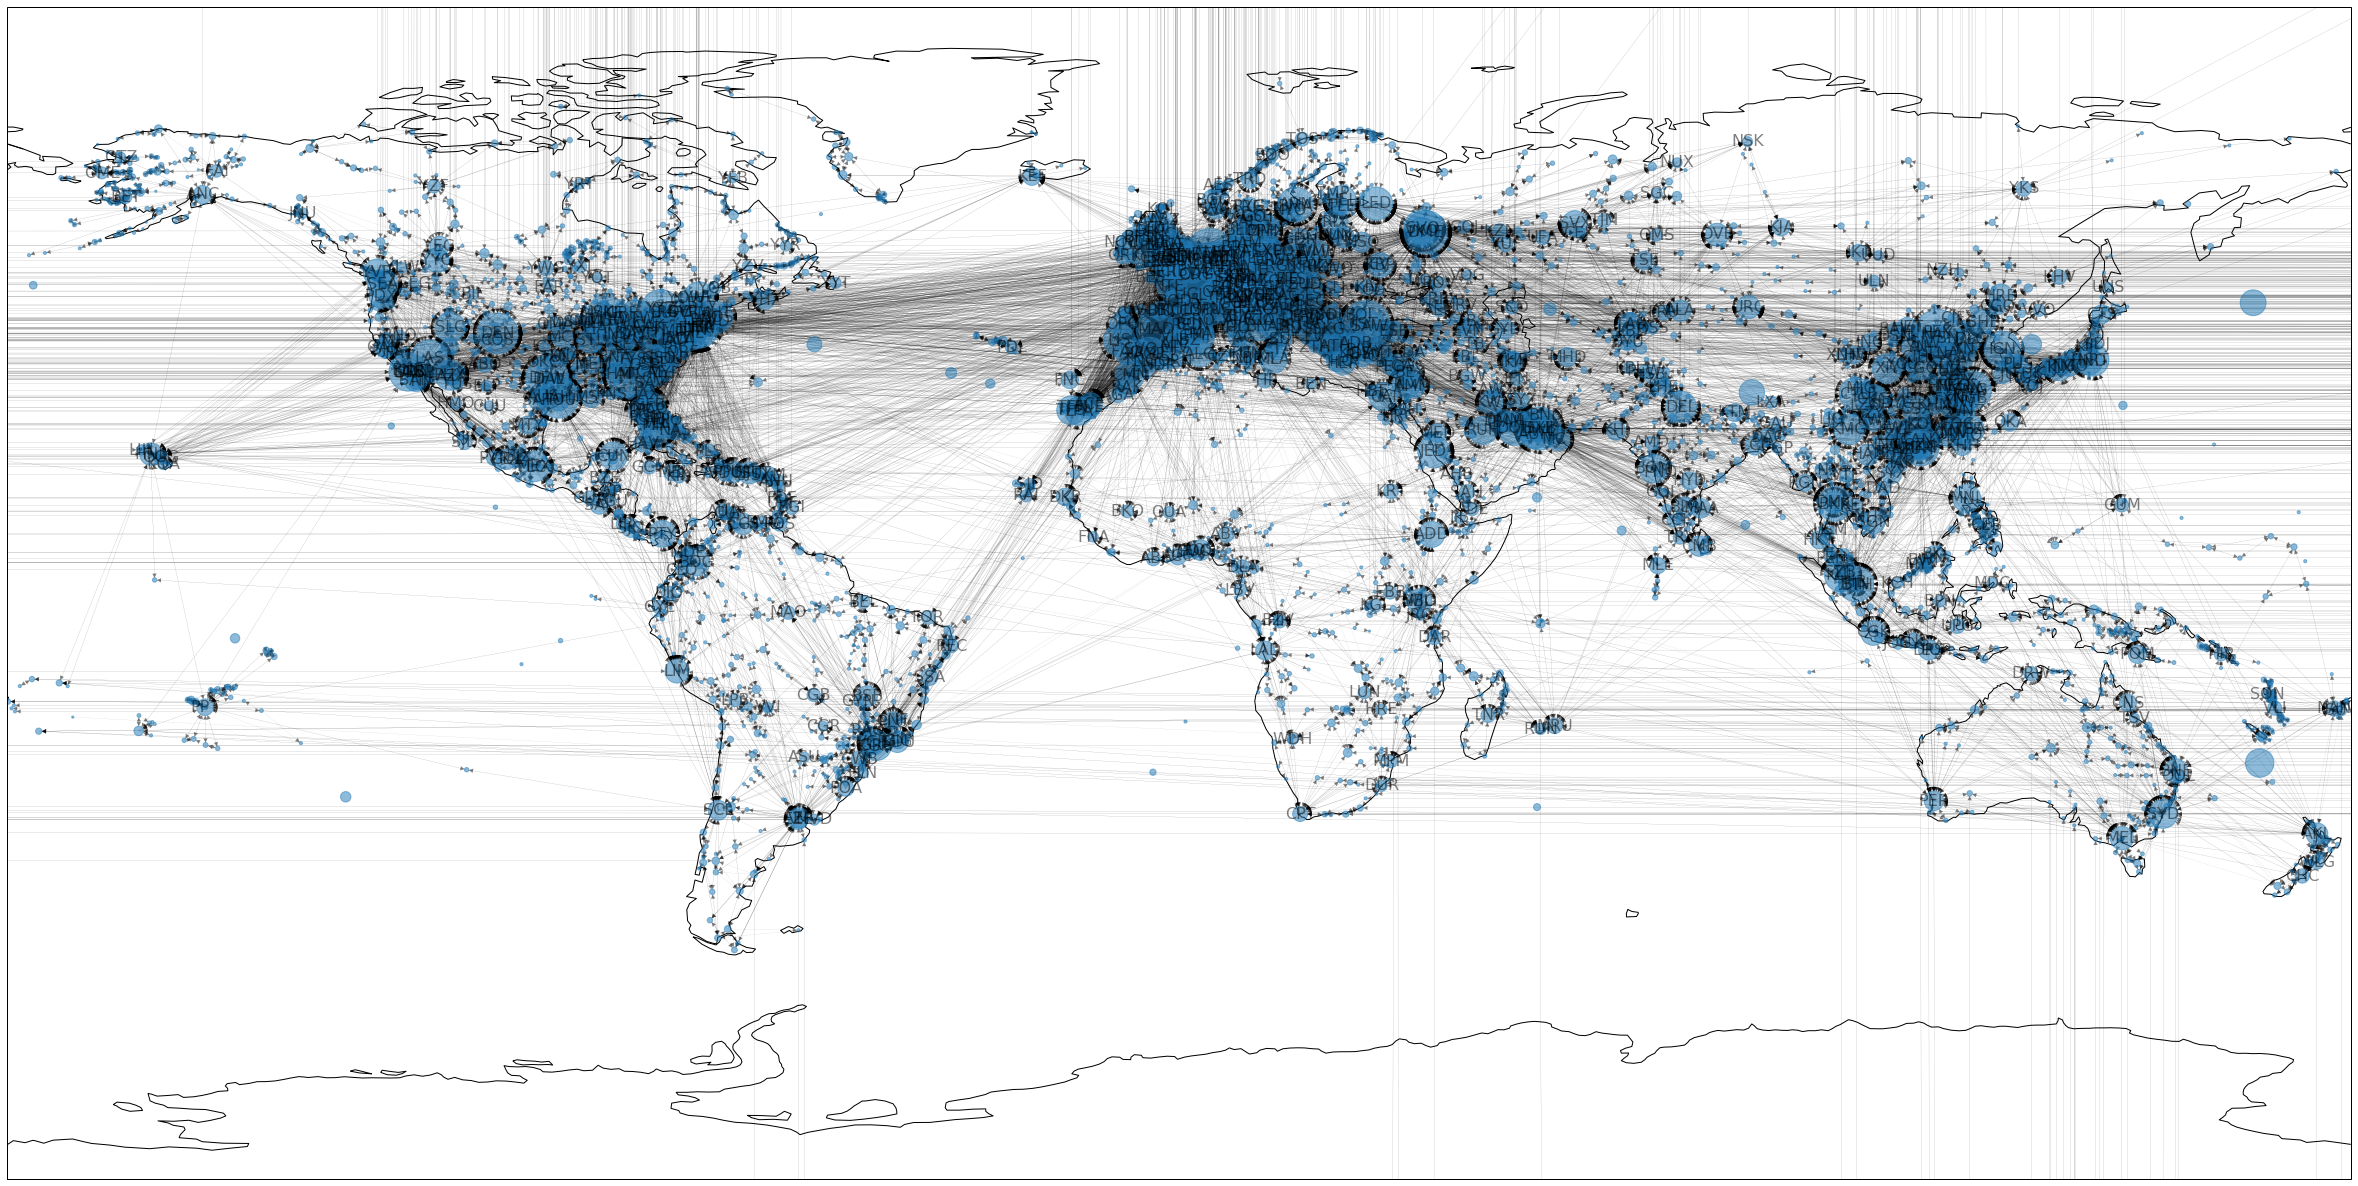

In [4]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

crs = ccrs.RotatedPole()
fig, ax = plt.subplots(
    1, 1, figsize=(42, 42),
    subplot_kw=dict(projection=ccrs.PlateCarree()))

ax.coastlines()

nx.draw_networkx(graph, ax=ax,
                  font_size=16,
                  alpha=.5,
                  width=.075,
                  node_size=sizes,
                  labels=labels,
                  pos=pos,
                  cmap=plt.cm.autumn)

# Get only the brazilian airports and the domestic flights

In [5]:
br_airports = airports[airports.country == "Brazil"]
br_flights = flights[
    flights['airport'].isin(br_airports.iata) &
    flights['dest_airport'].isin(br_airports.iata)]
br_flights.reset_index()

,index,airline,airline_id,airport,airport_id,dest_airport,dest_airport_id,codeshare,stops,equipment
0,214,2Z,1729,AUX,7376,PMW,4214,NaN,0,AT7
1,215,2Z,1729,BRA,7373,BSB,2531,NaN,0,AT7
2,216,2Z,1729,BRA,7373,SSA,2621,NaN,0,AT7
3,217,2Z,1729,BSB,2531,BRA,7373,NaN,0,AT7
4,218,2Z,1729,BSB,2531,OPS,7367,NaN,0,AT7
5,219,2Z,1729,BSB,2531,RAO,2613,NaN,0,AT7
6,220,2Z,1729,CAC,2535,GRU,2564,NaN,0,AT7
7,221,2Z,1729,CGB,2548,GYN,2562,NaN,0,AT7
8,222,2Z,1729,CGB,2548,OPS,7367,NaN,0,AT7
9,223,2Z,1729,CGR,2538,DOU,7380,NaN,0,AT7


In [6]:
br_graph, pos, labels, sizes = mount_graph(br_flights, br_airports,0)
br_graph.nodes

NodeView(('UDI', 'TUR', 'LDB', 'SJL', 'SXO', 'GRP', 'REC', 'JOI', 'OPS', 'MAO', 'GNM', 'PET', 'DOU', 'URG', 'PVH', 'JPR', 'BYO', 'AAX', 'AUX', 'CFC', 'PPB', 'OIA', 'CAC', 'JTC', 'NAT', 'IPN', 'JCB', 'STM', 'VCP', 'VDC', 'CPV', 'SJP', 'TBT', 'SXX', 'MEA', 'IOS', 'PIN', 'CXJ', 'BVH', 'MOC', 'BAZ', 'ARU', 'GPB', 'SSA', 'GIG', 'MEU', 'ERN', 'CNF', 'BVS', 'CCM', 'CMP', 'TMT', 'PNZ', 'CIZ', 'BRA', 'MGF', 'MCZ', 'FOR', 'FLN', 'GEL', 'CAW', 'CWB', 'GRU', 'ERM', 'OAL', 'XAP', 'CKS', 'CZS', 'ITB', 'RBR', 'AJU', 'POA', 'AQA', 'CGR', 'CLV', 'THE', 'BVB', 'IMP', 'MII', 'MCP', 'IGU', 'FEN', 'BEL', 'UBA', 'OLC', 'SRA', 'MAB', 'MQH', 'AFL', 'CDJ', 'CGH', 'RDC', 'CGB', 'PAV', 'PMW', 'POJ', 'ATM', 'CMG', 'JPA', 'PHB', 'NVT', 'PFB', 'TFF', 'SLZ', 'GVR', 'RVD', 'GYN', 'LAZ', 'JDO', 'RIA', 'STZ', 'CFB', 'BPS', 'IZA', 'IRZ', 'RAO', 'ORX', 'SJK', 'SDU', 'VIX', 'BSB', 'LEC', 'ROO', 'PLU'))

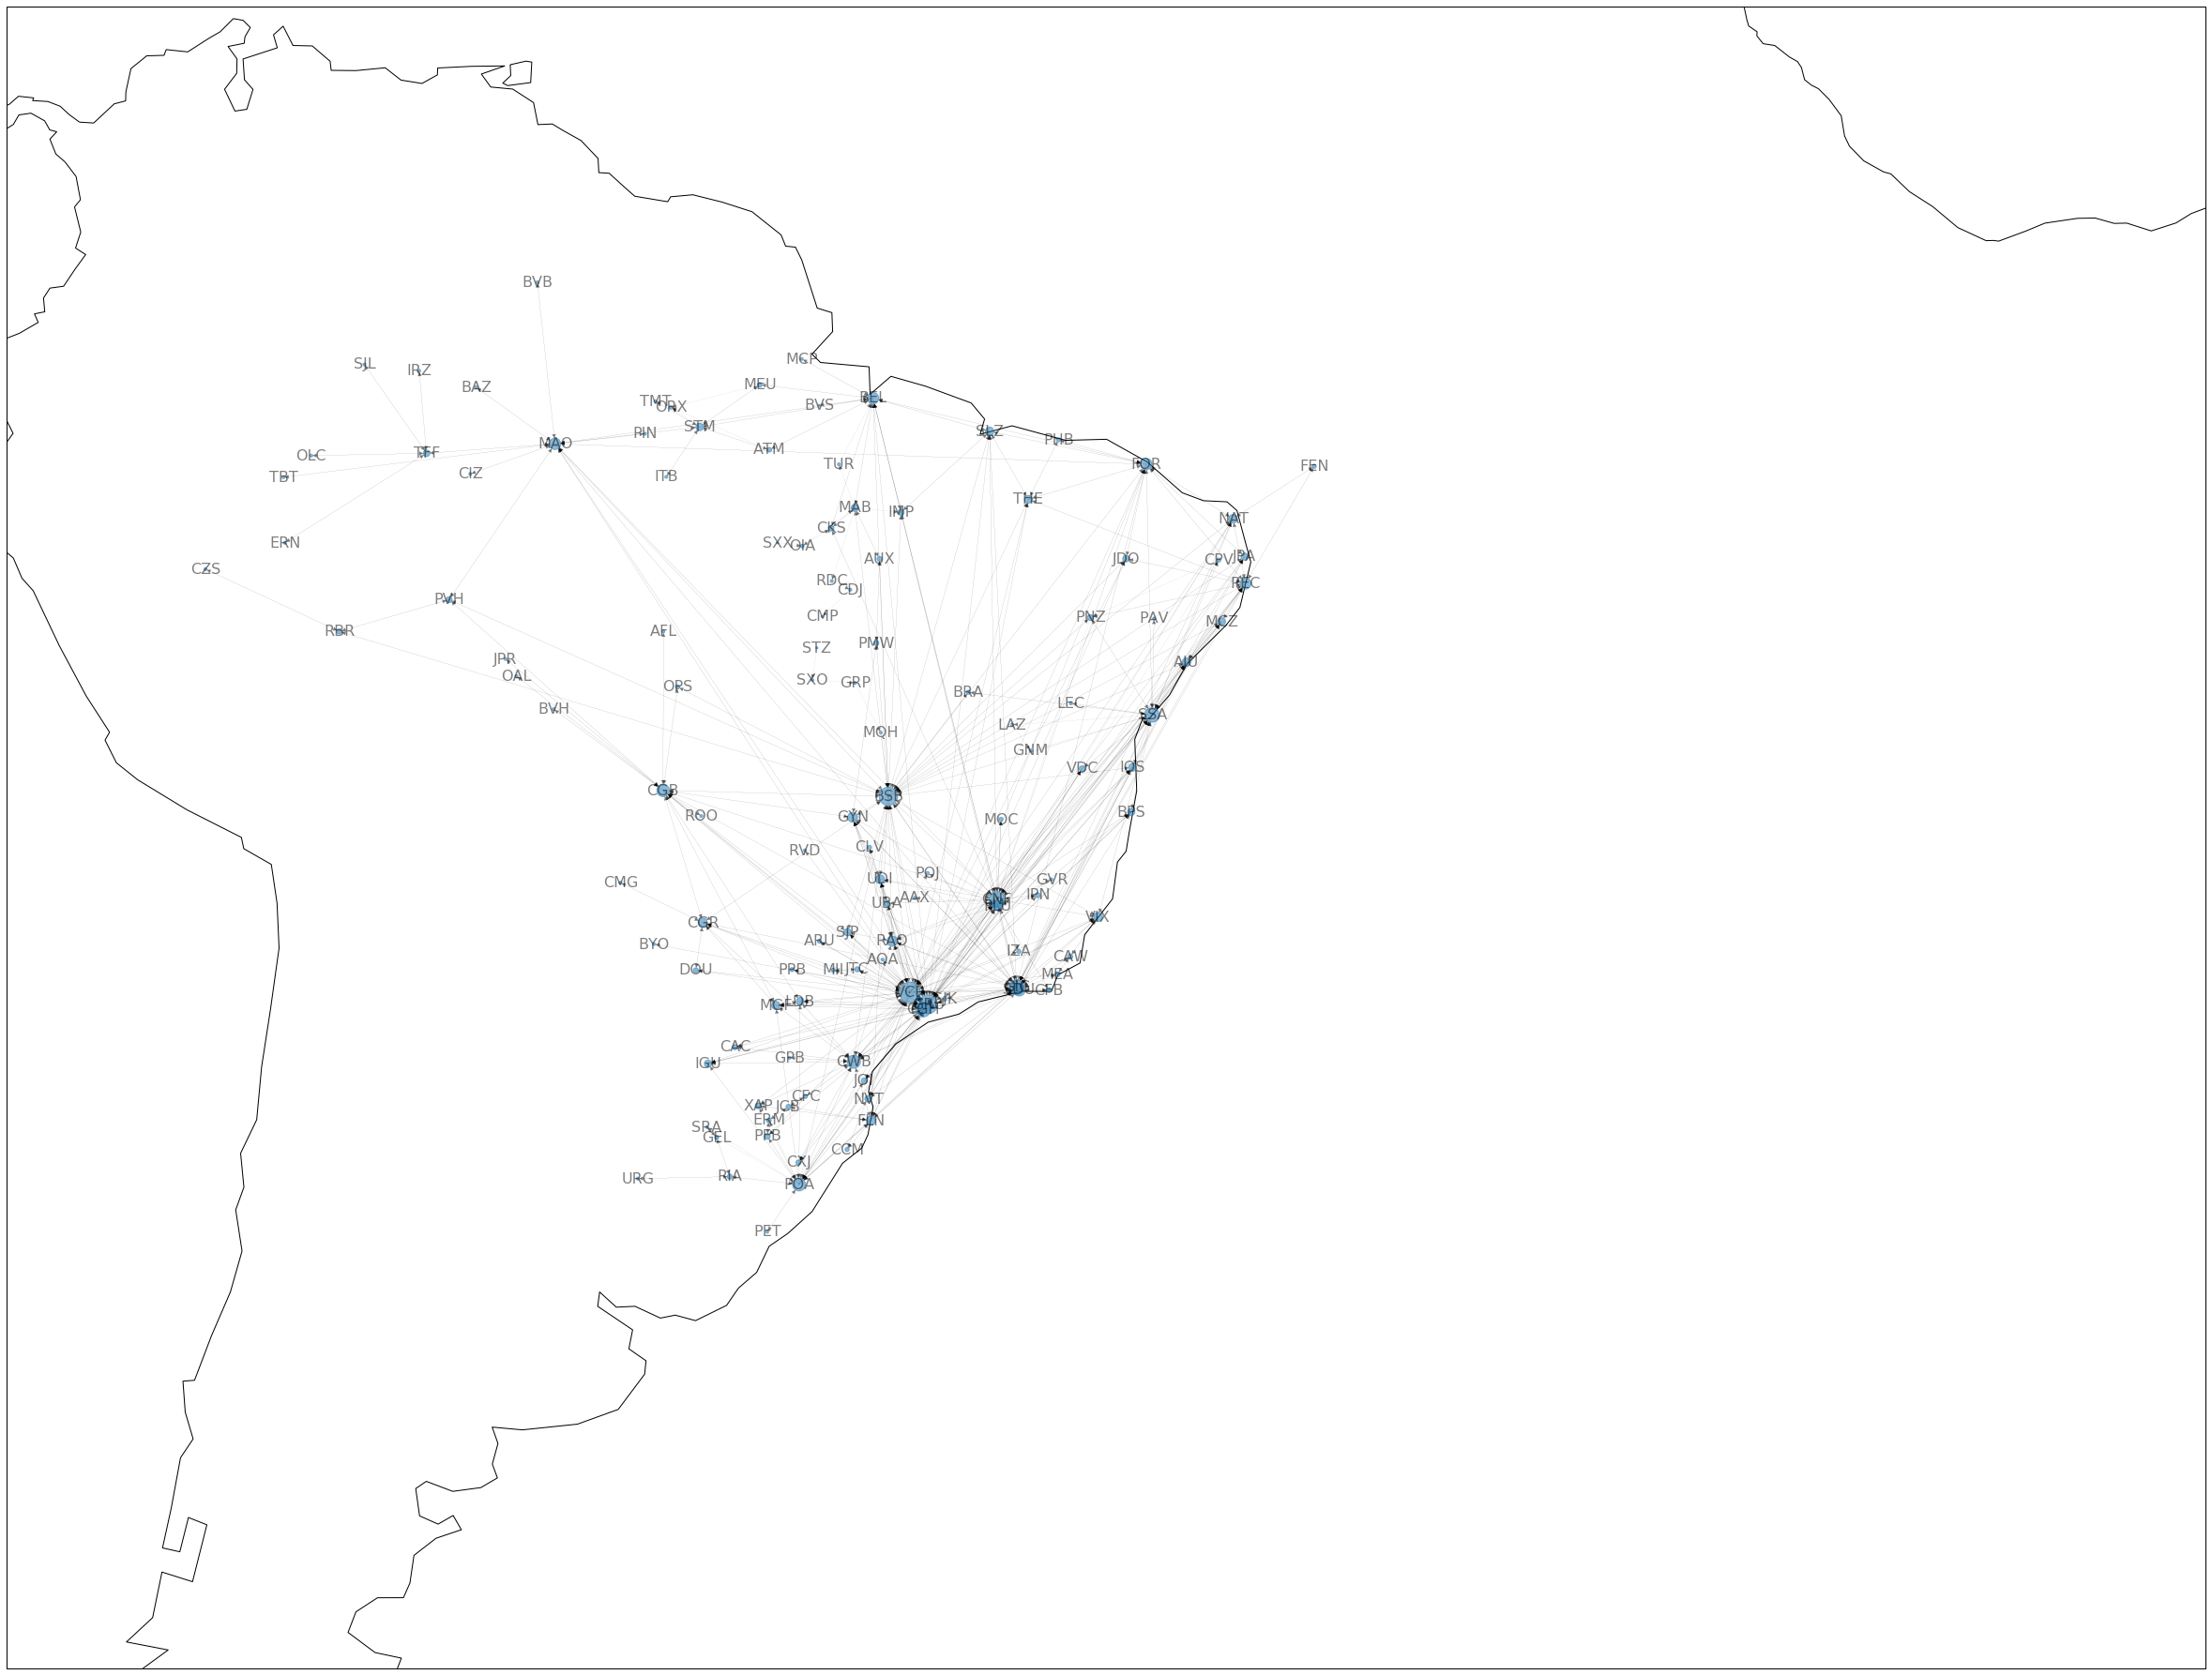

In [7]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

crs = ccrs.RotatedPole()
fig, ax = plt.subplots(
    1, 1, figsize=(42, 42),
    subplot_kw=dict(projection=ccrs.PlateCarree()))

ax.coastlines()
# # # Extent of continental Brazil.
ax.set_extent([-80, 0, -40, 10])
nx.draw_networkx(br_graph, ax=ax,
                  font_size=16,
                  alpha=.5,
                  width=.075,
                  node_size=sizes,
                  labels=labels,
                  pos=pos,
                  cmap=plt.cm.autumn)

In [8]:
def dfs(graph, visited, n):
    visited[n]= True
    for node in graph[n]:
        if not visited[node]:
            dfs(graph, visited, node)

In [9]:
def bfs(graph, visited, n): 
        queue = [] 
        queue.append(n)
        visited[n] = True
  
        while queue: 
            s = queue.pop(0) 
            print("Aeroportos com vôo diretos partindo de {}: ".format(airports[airports.iata == s].name.item()))
  
            for i in graph.neighbors(s): 
                print(airports[airports.iata == i].name.item())
                if visited[i] == False:
                    queue.append(i) 
                    visited[i] = True
            print('----------------------------------------------')

In [10]:
def transpose_graph(graph):
    transposed_graph = nx.Graph()
    for i in graph.nodes:
        for j in graph[i]: 
            transposed_graph.add_edge(j,i)
    return transposed_graph

In [11]:
def is_strongly_connected(graph, visited):
    dfs(graph, visited, 'BSB')
    
    print("Aeroportos que não foram visitados partindo de Brasília: ")
    print([airports[airports.iata == i].name.item() for i in visited if visited[i] == False])
    
    if any(n == False for n in visited.values()):
        return False
    
    tg = transpose_graph(graph)

    visited = {n: False  for n in graph.nodes} 

    dfs(tg,visited,'BSB') 

    if any(i == False for i in visited.values()): 
        return False

    return True

In [12]:
def is_connected(graph, src, dest, visited, path):
    visited[src] = True
    path.append(src)
    if src == dest:
        return True, path
    
    for node in graph[src]:
        if not visited[node]:
            if is_connected(graph, node, dest, visited, path)[0]:
                return True, path
    
    path = path[:len(path)-1]
    
    return False, path

In [13]:
visited = {n: False for n in br_graph.nodes}

res = (is_connected(br_graph, 'BSB', 'DOU', visited, []))
path = res[1]
print(res[0])
edges = [(path[i - 1], path[i]) for i in range(1, len(path))]


True


In [14]:
edges

[('BSB', 'CWB'),
 ('CWB', 'GIG'),
 ('GIG', 'GRU'),
 ('GRU', 'VDC'),
 ('VDC', 'CNF'),
 ('CNF', 'CPV'),
 ('CPV', 'PNZ'),
 ('PNZ', 'REC'),
 ('REC', 'THE'),
 ('THE', 'PHB'),
 ('PHB', 'FOR'),
 ('FOR', 'JPA'),
 ('JPA', 'SSA'),
 ('SSA', 'PAV'),
 ('PAV', 'IOS'),
 ('IOS', 'CGH'),
 ('CGH', 'UDI'),
 ('UDI', 'GYN'),
 ('GYN', 'PMW'),
 ('PMW', 'AUX'),
 ('AUX', 'MAB'),
 ('MAB', 'TUR'),
 ('TUR', 'BEL'),
 ('BEL', 'IMP'),
 ('IMP', 'SLZ'),
 ('SLZ', 'BVS'),
 ('BVS', 'ATM'),
 ('ATM', 'ORX'),
 ('ORX', 'STM'),
 ('STM', 'MEU'),
 ('MEU', 'ITB'),
 ('ITB', 'MAO'),
 ('MAO', 'BVB'),
 ('BVB', 'TBT'),
 ('TBT', 'PIN'),
 ('PIN', 'TFF'),
 ('TFF', 'ERN'),
 ('ERN', 'OLC'),
 ('OLC', 'SJL'),
 ('SJL', 'IRZ'),
 ('IRZ', 'CIZ'),
 ('CIZ', 'BAZ'),
 ('BAZ', 'PVH'),
 ('PVH', 'RBR'),
 ('RBR', 'CZS'),
 ('CZS', 'CGB'),
 ('CGB', 'LDB'),
 ('LDB', 'MGF'),
 ('MGF', 'CGR'),
 ('CGR', 'CMG'),
 ('CMG', 'DOU')]

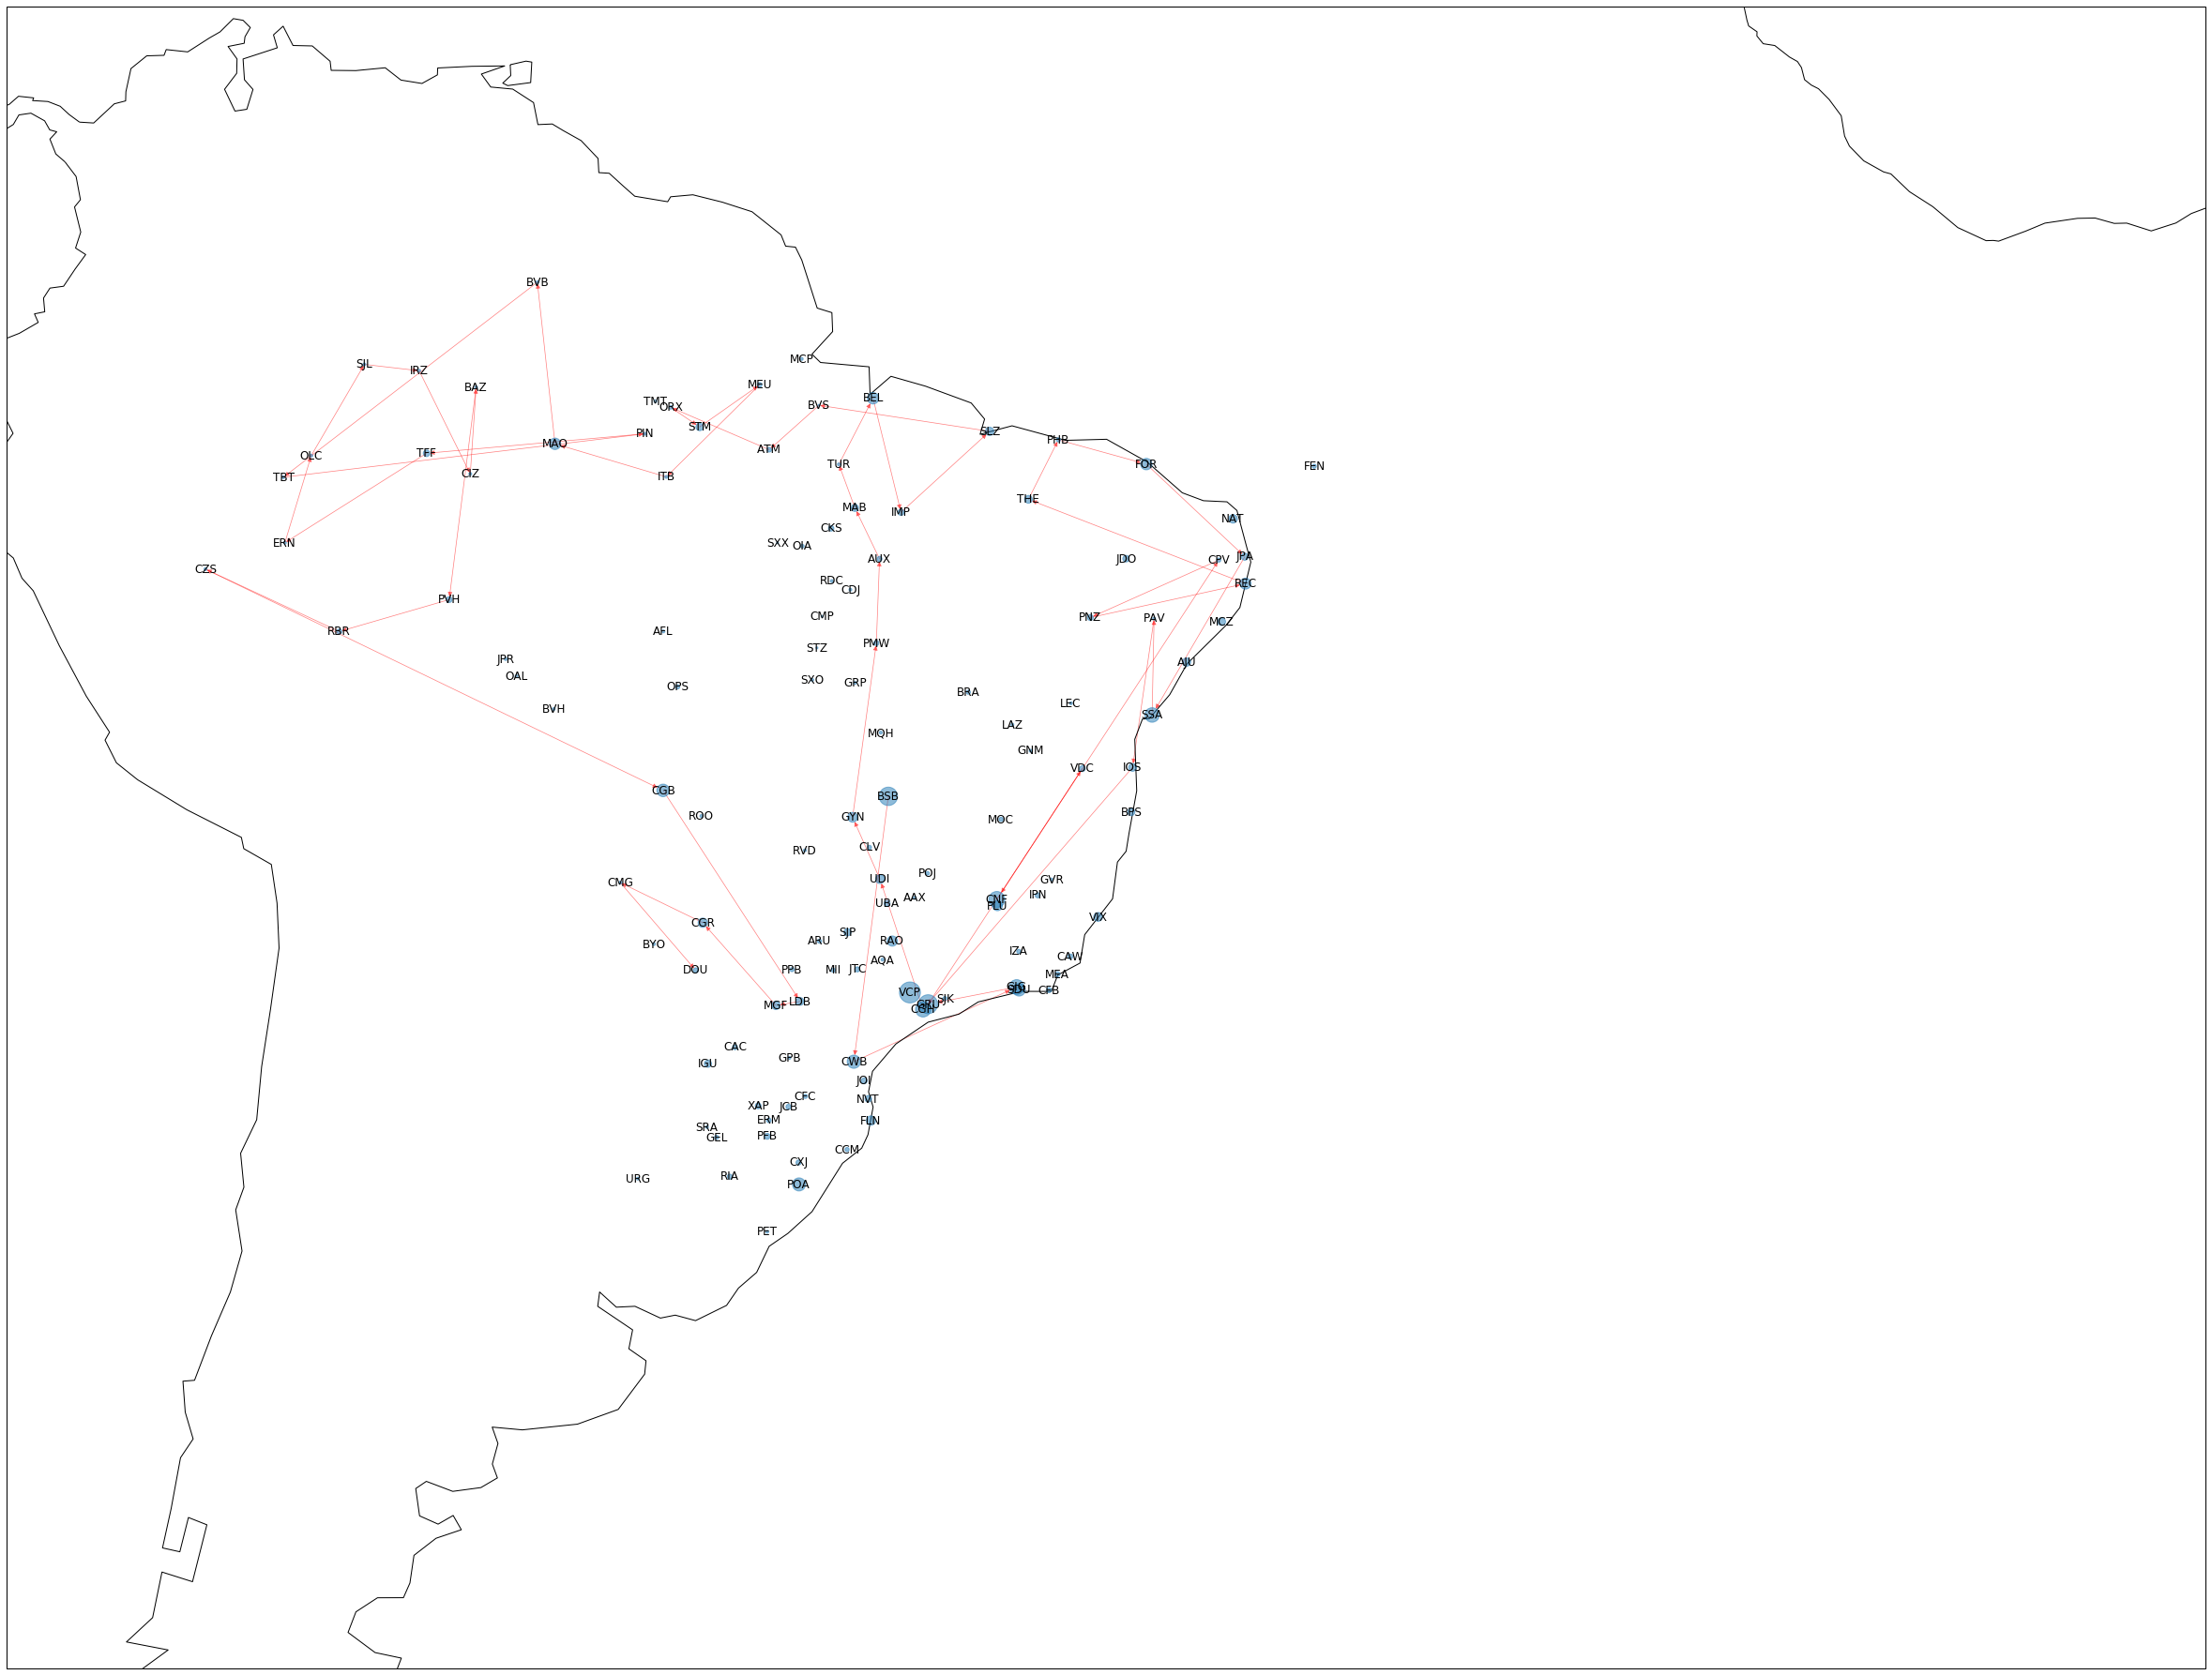

In [15]:
%matplotlib inline

crs = ccrs.RotatedPole()
fig, ax = plt.subplots(
    1, 1, figsize=(42, 42),
    subplot_kw=dict(projection=ccrs.PlateCarree()))

ax.coastlines()

colors = ['red' if i in edges else 'white' for i in edges ]
width = [2 if i in edges else 0.1 for i in br_graph.edges ]

# # # Extent of continental Brazil.
ax.set_extent([-80, 0, -40, 10])
nx.draw_networkx_nodes(br_graph, ax=ax,
                  font_size=16,
                  alpha=.5,
                  width=0.7,
                  node_size=sizes,
                 edge_color=colors,
                  label=labels,
                  pos=pos,
                  cmap=plt.cm.autumn)

nx.draw_networkx_edges(br_graph, ax=ax,
                       edgelist=edges,
                  font_size=16,
                  alpha=.5,
                  width=0.7,
                  node_size=sizes,
                 edge_color=colors,
                  labels=labels,
                  pos=pos)
nx.draw_networkx_labels(br_graph,pos=pos)
plt.show()

In [16]:
visited = {n: False for n in br_graph.nodes}

bfs(br_graph, visited, 'GRU')

Aeroportos com vôo diretos partindo de Guarulhos - Governador André Franco Montoro International Airport: 
Vitória da Conquista Airport
Ten. Cel. Aviador César Bombonato Airport
Lauro Carneiro de Loyola Airport
Dourados Airport
Prof. Eribelto Manoel Reino State Airport
Presidente Castro Pinto International Airport
Val de Cans/Júlio Cezar Ribeiro International Airport
Guararapes - Gilberto Freyre International Airport
Eurico de Aguiar Salles Airport
Lauro Kurtz Airport
Bahia - Jorge Amado Airport
Ministro Victor Konder International Airport
Eduardo Gomes International Airport
Marechal Cunha Machado International Airport
Pinto Martins International Airport
Araçatuba Airport
Santa Genoveva Airport
Santa Maria Airport
Salgado Filho Airport
Presidente Juscelino Kubistschek International Airport
Deputado Luiz Eduardo Magalhães International Airport
Rio Galeão – Tom Jobim International Airport
Senador Petrônio Portela Airport
Governador José Richa Airport
Tancredo Neves International Airport


Governador Aluízio Alves International Airport
Marechal Cunha Machado International Airport
Salgado Filho Airport
Santa Maria Airport
Santa Genoveva Airport
Governador Jorge Teixeira de Oliveira Airport
Araguaína Airport
Senador Nilo Coelho Airport
Deputado Luiz Eduardo Magalhães International Airport
Rio Galeão – Tom Jobim International Airport
Senador Petrônio Portela Airport
Prefeito Renato Moreira Airport
Tancredo Neves International Airport
Campo Grande Airport
Val de Cans/Júlio Cezar Ribeiro International Airport
Eduardo Gomes International Airport
Plácido de Castro Airport
Eurico de Aguiar Salles Airport
João Correa da Rocha Airport
Marechal Rondon Airport
Congonhas Airport
Zumbi dos Palmares Airport
Pinto Martins International Airport
Hercílio Luz International Airport
Santos Dumont Airport
Barreiras Airport
Viracopos International Airport
----------------------------------------------
Aeroportos com vôo diretos partindo de Deputado Luiz Eduardo Magalhães International Airport:

Guarulhos - Governador André Franco Montoro International Airport
Patos de Minas Airport
Cabo Frio Airport
Romeu Zema Airport
Usiminas Airport
Leite Lopes Airport
Professor Urbano Ernesto Stumpf Airport
Mário Ribeiro Airport
Coronel Altino Machado de Oliveira Airport
Ten. Cel. Aviador César Bombonato Airport
Viracopos International Airport
----------------------------------------------
Aeroportos com vôo diretos partindo de Congonhas Airport: 
Afonso Pena Airport
Ten. Cel. Aviador César Bombonato Airport
Regional de Maringá - Sílvio Nane Junior Airport
Prof. Eribelto Manoel Reino State Airport
Santa Genoveva Airport
Lauro Carneiro de Loyola Airport
Bahia - Jorge Amado Airport
Ministro Victor Konder International Airport
Hugo Cantergiani Regional Airport
Governador José Richa Airport
Rio Galeão – Tom Jobim International Airport
Salgado Filho Airport
Deputado Luiz Eduardo Magalhães International Airport
Nelson Ribeiro Guimarães Airport
Tancredo Neves International Airport
Porto Seguro Ai

Maestro Wilson Fonseca Airport
----------------------------------------------
Aeroportos com vôo diretos partindo de Eirunepé Airport: 
Tefé Airport
----------------------------------------------
Aeroportos com vôo diretos partindo de Senadora Eunice Micheles Airport: 
Tefé Airport
----------------------------------------------
Aeroportos com vôo diretos partindo de São Gabriel da Cachoeira Airport: 
Tefé Airport
----------------------------------------------
Aeroportos com vôo diretos partindo de Tapuruquara Airport: 
Tefé Airport
----------------------------------------------
Aeroportos com vôo diretos partindo de Santo Ângelo Airport: 
Salgado Filho Airport
Santa Maria Airport
----------------------------------------------
Aeroportos com vôo diretos partindo de Rubem Berta Airport: 
Santa Maria Airport
----------------------------------------------
Aeroportos com vôo diretos partindo de Cruzeiro do Sul Airport: 
Plácido de Castro Airport
---------------------------------------------

In [17]:
visited = {n: False for n in br_graph.nodes}

is_strongly_connected(br_graph, visited)

Aeroportos que não foram visitados partindo de Brasília: 
['Gurupi Airport', 'São Félix do Xingu Airport', 'São Félix do Araguaia Airport', 'Minaçu Airport', 'Santa Terezinha Airport']


False